In [1]:
# import dagshub
# dagshub.init(repo_owner='akasharan-a', repo_name='Weather_forecasting_with_MLOps', mlflow=True)

# import mlflow
# with mlflow.start_run():
#   mlflow.log_param('parameter name', 'value')
#   mlflow.log_metric('metric name', 1)

In [2]:
import pandas as pd
import os
import numpy as np
from dotenv import load_dotenv
from darts import TimeSeries 
data = pd.read_csv("../mlops_services/data/historical_weather_data_blr.csv",header=3,parse_dates=['time'],index_col='time')
data.head()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
time,,,,,,,,,,,,,
2023-01-01 00:00:00,16.2,74,11.7,0.0,0,914.8,1,0.02,0.47,9.4,97,15.1,0
2023-01-01 01:00:00,16.1,75,11.6,0.0,0,914.1,0,0.02,0.46,9.8,96,16.2,0
2023-01-01 02:00:00,15.6,80,12.1,0.0,3,913.3,83,0.01,0.36,9.8,96,16.2,0
2023-01-01 03:00:00,15.3,84,12.7,0.0,2,913.0,78,0.00,0.27,10.2,100,16.9,0
2023-01-01 04:00:00,14.8,89,13.1,0.0,2,912.9,61,0.00,0.18,9.1,99,16.9,0


In [3]:
load_dotenv('../secrets.env')

True

In [4]:
data.tail()

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),is_day ()
time,,,,,,,,,,,,,
2025-07-09 01:00:00,20.8,89,19.0,0.0,2,909.9,51,0.01,0.27,13.8,252,32.0,0
2025-07-09 02:00:00,20.4,89,18.6,0.0,2,909.2,60,0.00,0.25,13.4,252,31.0,0
2025-07-09 03:00:00,20.0,91,18.4,0.0,3,908.9,94,0.00,0.21,12.6,251,30.2,0
2025-07-09 04:00:00,19.7,92,18.4,0.0,3,908.9,94,0.00,0.18,13.6,250,29.5,0
2025-07-09 05:00:00,19.6,92,18.2,0.0,3,909.1,100,0.00,0.19,14.6,252,32.0,0


In [6]:
data['month'] = data.index.month
data['hour'] = data.index.hour
normalized_hours = ((data.index.hour / 24) * 2 * np.pi) - ((2 / 24) * 2 * np.pi)
data['daily_cycle'] = (-np.cos(normalized_hours) + 1) / 2

In [7]:
from darts.utils.model_selection import train_test_split
y = 'temperature_2m (°C)'
x_past = [ 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'weather_code (wmo code)',
       'surface_pressure (hPa)', 'cloud_cover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)',
       'wind_gusts_10m (km/h)']
x_future = ['hour','month'] #daily_cycle


In [8]:
series = TimeSeries.from_dataframe(data, value_cols=data.columns.values,fill_missing_dates=True)
series = series[:pd.Timestamp('2024-12-31 23:00')]

series_train,series_test  = train_test_split(series,test_size=0.25)

<Axes: xlabel='time'>

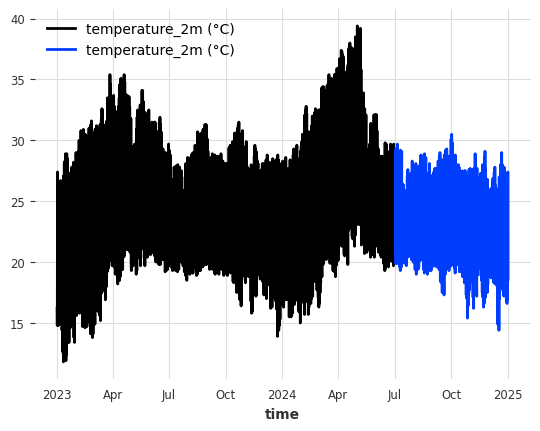

In [9]:

train_y,test_y =  series_train[y] , series_test[y]
train_X_past,test_X_past = series_train[x_past] , series_test[x_past]
train_X_future,test_X_future = series_train[x_future] , series_test[x_future]

train_y.plot()
test_y.plot()

In [11]:
from darts.models import XGBModel 
# model_xgb =  XGBModel(
#     lags=72,
#     lags_past_covariates=72,lags_future_covariates=[24,24],
#     output_chunk_length=24,
#     random_state= 100)

# model_xgb.fit(train_y,train_X_past ,train_X_future)
# model_xgb.save('xgb.model')

Support for PyTorch based likelihood models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.12/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.i

In [12]:
model_xgb = XGBModel.load('xgb.model')

In [13]:
from darts.metrics import metrics

In [14]:
rmse,mape = model_xgb.backtest(test_y,test_X_past ,test_X_future,forecast_horizon=24,last_points_only =False,retrain=False,metric=[metrics.rmse,metrics.mape])

In [15]:
rmse,mape

(0.9684841885497373, 3.347183336370535)

In [20]:
pred = model_xgb.historical_forecasts(series=test_y,past_covariates=test_X_past , future_covariates=test_X_future,forecast_horizon=24,stride=1,last_points_only =True,retrain=False)
pred.to_dataframe()

,temperature_2m (°C)
time,
2024-07-06 05:00:00,20.117039
2024-07-06 06:00:00,20.436489
2024-07-06 07:00:00,21.115286
2024-07-06 08:00:00,22.922461
2024-07-06 09:00:00,23.922178
...,...
2024-12-31 18:00:00,22.410151
2024-12-31 19:00:00,22.112183
2024-12-31 20:00:00,21.206926


In [6]:

os.environ["MLFLOW_TRACKING_USERNAME"] ,os.environ["MLFLOW_TRACKING_PASSWORD"]

print("66")##

66


In [ ]:
# with mlflow.start_run():
#     mlflow.log_param("model_type", "XGB")  # example
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mape", mape)
#     mlflow.pyfunc.log_model(
#         name="darts_pyfunc_model",
#         python_model=DartsForecastModel(),
#         conda_env=conda_env
#     )

2025/07/20 12:21:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
import mlflow.pyfunc
from mlflow.models.signature import ModelSignature, infer_signature
from mlflow.types.schema import Schema, ColSpec
from mlflow.types.schema import ParamSpec, ParamSpecTypes

class DartsForecastModel(mlflow.pyfunc.PythonModel):
    def __init__(self,darts_model):
        super().__init__()
        self.model = darts_model
        
    def predict(self, model_input: pd.DataFrame, params) -> pd.DataFrame:
        data=model_input.copy()
        forcast_horizon = params["horizon"]

        last_date = data.index[-1]
        future_dates = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forcast_horizon+1, freq="h")
        # Create new DataFrame with NaNs for forecast horizon
        future_df = pd.DataFrame(index=future_dates)
        future_df['month'] = future_df.index.month
        future_df['hour'] = future_df.index.hour
        normalized_hours = ((future_df.index.hour / 24) * 2 * np.pi) - ((2 / 24) * 2 * np.pi)
        future_df['daily_cycle'] = (-np.cos(normalized_hours) + 1) / 2
        ts = TimeSeries.from_dataframe(data,value_cols=data.columns.values,fill_missing_dates=True)
        ts_f = TimeSeries.from_dataframe(future_df,value_cols=future_df.columns.values,fill_missing_dates=True)
        ts_y = ts[y]
        ts_x_past = ts[x_past]
        ts_x_future = ts_f[x_future]
        prediction = self.model.predict(forcast_horizon, series=ts_y,past_covariates=ts_x_past,future_covariates=ts_x_future)
        return prediction.to_dataframe()

inputs: 
  ['temperature_2m (°C)': double (required), 'relative_humidity_2m (%)': double (required), 'dew_point_2m (°C)': double (required), 'rain (mm)': double (required), 'weather_code (wmo code)': double (required), 'surface_pressure (hPa)': double (required), 'cloud_cover (%)': double (required), 'et0_fao_evapotranspiration (mm)': double (required), 'vapour_pressure_deficit (kPa)': double (required), 'wind_speed_10m (km/h)': double (required), 'wind_direction_10m (°)': double (required), 'wind_gusts_10m (km/h)': double (required), 'is_day ()': double (required)]
outputs: 
  ['temperature_2m (°C)': float (required)]
params: 
  ['horizon': long (default: 24)]

TypeError: 'TimeSeries' object does not support item assignment

In [94]:
xgb = DartsForecastModel(model_xgb)
pred = xgb.predict(series_test.to_dataframe(),{'horizon':24})
pred.head()

,temperature_2m (°C)
time,
2025-01-01 00:00:00,18.019157
2025-01-01 01:00:00,17.281256
2025-01-01 02:00:00,16.636139
2025-01-01 03:00:00,16.379726
2025-01-01 04:00:00,16.362862


In [56]:
xgb

In [96]:
mlflow.set_tracking_uri("https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow")
with mlflow.start_run(experiment_id=1) as run:
    mlflow.log_param("run", run.info.run_id)
    mlflow.log_param("model_type", "XGB")  # example
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mape", mape)
    mlflow.pyfunc.log_model(
        "darts_pyfunc_model",
        python_model=DartsForecastModel(model_xgb),
        pip_requirements=["u8darts"],
        registered_model_name="DartsXGB",
        signature=infer_signature(model_input=series_test.to_dataframe(),model_output=pred,params={'horizon':24})
    )        


/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.12/site-packages/mlflow/pyfunc/__init__.py:3224: UserWarning: An input example was not provided when logging the model. To ensure the model signature functions correctly, specify the `input_example` parameter. See https://mlflow.org/docs/latest/model/signatures.html#model-input-example for more details about the benefits of using input_example.
  color_warning(
2025/07/26 18:58:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'DartsXGB' already exists. Creating a new version of this model...
2025/07/26 18:58:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DartsXGB, version 3
Created version '3' of model 'DartsXGB'.


🏃 View run sneaky-sow-605 at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1/runs/e0ab22fd46734e35848d25064a5408e2
🧪 View experiment at: https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow/#/experiments/1


In [11]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/akasharan-a/Weather_forecasting_with_MLOps.mlflow")

model_uri = f"models:/DartsXGB/latest"
loaded_model = mlflow.pyfunc.load_model(model_uri)
# Predict on your data.
loaded_model.predict(series_test.to_dataframe(),params={'horizon':24})

/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/legacy/Projects/Weather_forecasting_with_MLOps/.venv/lib/python3.12/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
2025/07/26 19:12:06 WARNING mlflow.models.utils: Found extra inputs in the model input that are not defined in the model signature: `['month', 'hour', 'daily_cycle']`. These inputs will be ignored.


,temperature_2m (°C)
time,
2025-01-01 00:00:00,18.019157
2025-01-01 01:00:00,17.281256
2025-01-01 02:00:00,16.636139
2025-01-01 03:00:00,16.379726
2025-01-01 04:00:00,16.362862
2025-01-01 05:00:00,15.859170
2025-01-01 06:00:00,16.683790
2025-01-01 07:00:00,17.757301
2025-01-01 08:00:00,19.533890


In [20]:
loaded_model.run_id

AttributeError: 'PyFuncModel' object has no attribute 'run_id'